In [4]:
# connected to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pickle

In [5]:
file_path = '/content/drive/My Drive/CognitiveLevelDataset.csv'

df = pd.read_csv(file_path)

In [6]:
print(df.head())
print(df.info())
print(df.describe())

   Gender  Age (5-14) Family History  Problem Solving  \
0  Female           8             No                4   
1    Male          13             No                4   
2  Female          14            Yes                2   
3  Female          10             No                1   
4    Male          12             No                1   

   Visual Learning Preference  Response to Guidance  Task Independence  \
0                           4                     3                  3   
1                           4                     3                  5   
2                           3                     1                  3   
3                           1                     1                  3   
4                           4                     2                  3   

   Object Identification  Error Correction Cognitive Level  
0                      2                 1        Moderate  
1                      5                 3            Mild  
2                      2     

## **Data Pre-proccesing**

In [8]:
#check for null valuess
df.isnull().sum().sort_values(ascending=False)

,0
Gender,0
Age (5-14),0
Family History,0
Problem Solving,0
Visual Learning Preference,0
Response to Guidance,0
Task Independence,0
Object Identification,0
Error Correction,0
Cognitive Level,0


In [7]:
#encode categorical variables

mappings = {
    "Gender": {"Male": 0, "Female": 1},
    "Family History": {"Yes": 1, "No": 0},
    "Cognitive Level": {"Mild": 0, "Moderate": 1, "Severe": 2}
}

# Apply mappings to the DataFrame
for column, mapping in mappings.items():
    if column in df.columns:  # Check if the column exists in your DataFrame
        df[column] = df[column].map(mapping)

In [8]:
df.head(10)

,Gender,Age (5-14),Family History,Problem Solving,Visual Learning Preference,Response to Guidance,Task Independence,Object Identification,Error Correction,Cognitive Level
0,1,8,0,4,4,3,3,2,1,1
1,0,13,0,4,4,3,5,5,3,0
2,1,14,1,2,3,1,3,2,2,2
3,1,10,0,1,1,1,3,2,1,2
4,0,12,0,1,4,2,3,1,1,2
5,0,13,0,4,4,3,5,5,3,0
6,0,12,1,2,3,3,3,3,3,1
7,0,7,1,1,3,1,2,2,4,2
8,1,12,0,2,4,5,3,5,5,0
9,0,6,1,4,2,5,4,4,4,0


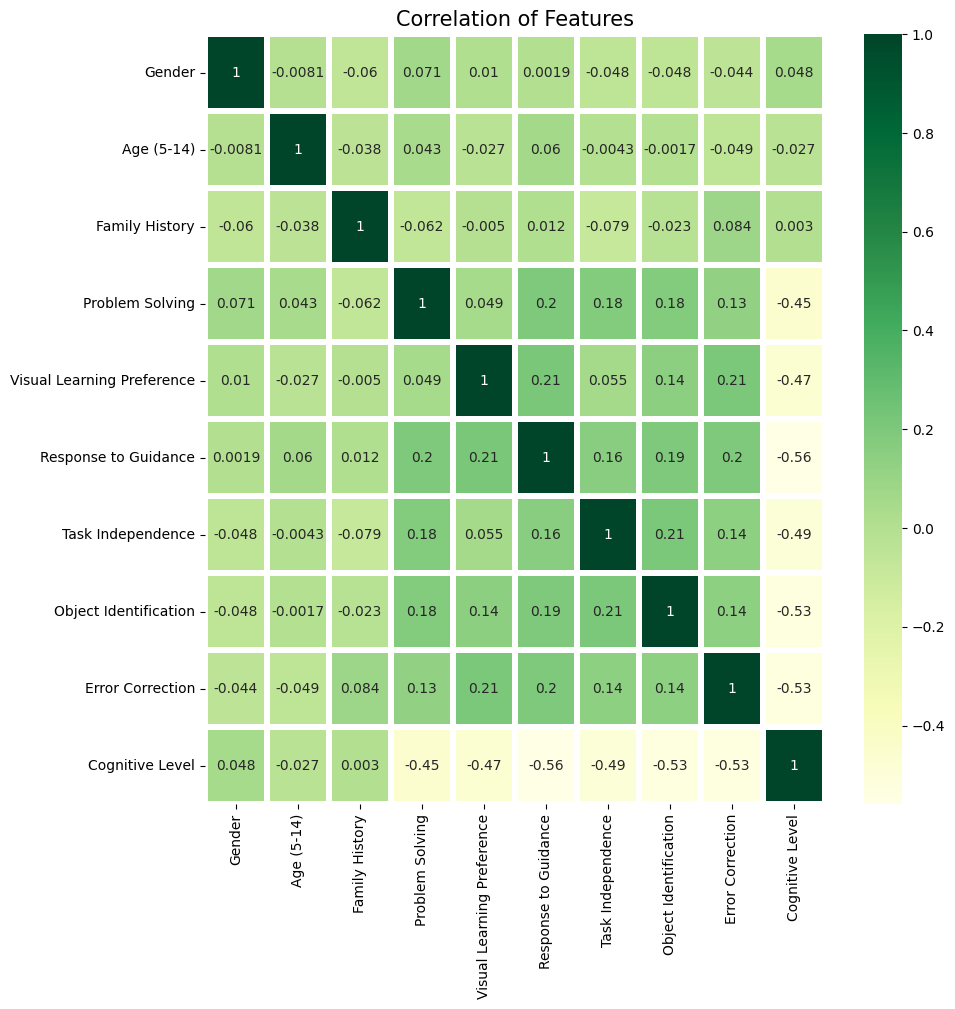

In [11]:
# Increase the plot size by specifying figsize
fig, ax = plt.subplots(figsize=(10, 10))

# Create a heatmap
sns.heatmap(df.corr(),ax=ax, annot=True,linewidth=3 ,cmap="YlGn")

#plot title
plt.title("Correlation of Features", size=15, y=1)

# Show the plot
plt.show()

In [12]:
#Sorting correlation values in descending order by FDcreated attribute
df.corr()["Cognitive Level"].sort_values(ascending=False)

,Cognitive Level
Cognitive Level,1.000000
Gender,0.047603
Family History,0.002988
Age (5-14),-0.027358
Problem Solving,-0.453286
Visual Learning Preference,-0.466326
Task Independence,-0.492373
Error Correction,-0.529899
Object Identification,-0.530224
Response to Guidance,-0.559158


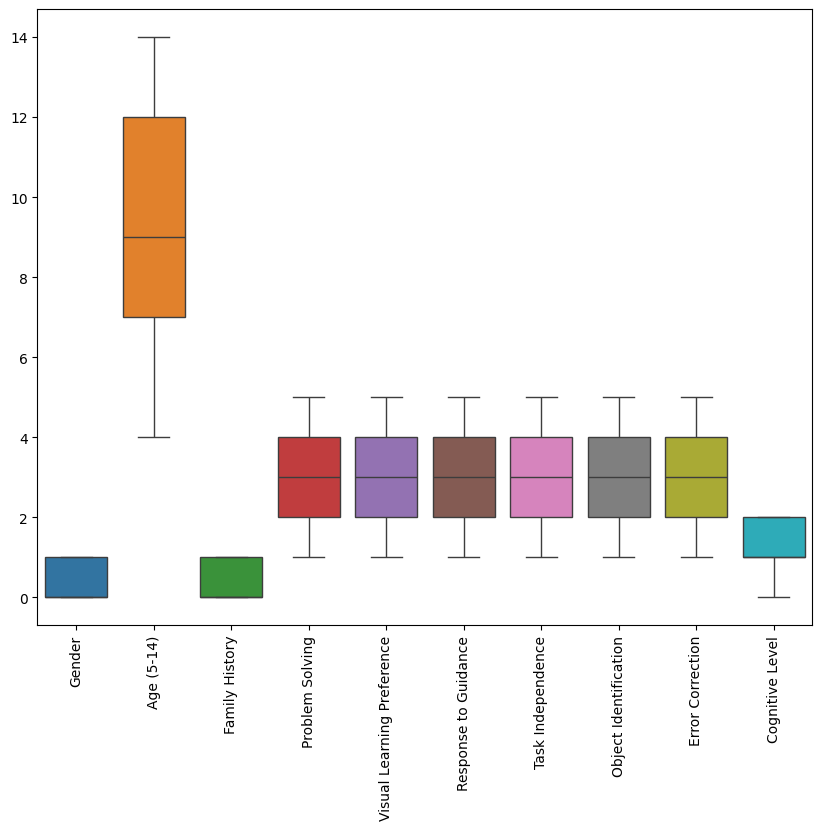

In [13]:
#Find outliers

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, ax=ax)

# Create a box plot
# df.plot.box(ax=ax)

# Set axis labels and ticks
plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')

# Show the plot
plt.show()

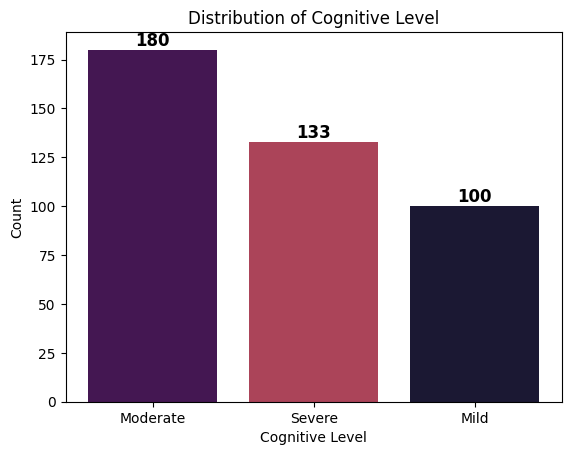

In [14]:
# Count the occurrences of 1s and 0s in the 'FDcreated' column
fd_counts = df['Cognitive Level'].value_counts()

# Define custom colors for the bars
colors = ['#441752', '#AB4459', '#1B1833']

# Create a bar plot with custom colors and labels "Mild": 0, "Moderate": 1, "Severe": 2}
plt.bar(fd_counts.index.map({2: 'Severe', 1: 'Moderate', 0: 'Mild'}), fd_counts.values, color=colors)

# Add labels to the bars (side positioning)
for i, count in enumerate(fd_counts):
    plt.text(i, count, f'{count}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black', rotation=0)

# Add labels and title
plt.xlabel('Cognitive Level')
plt.ylabel('Count')
plt.title('Distribution of Cognitive Level')

# Show the plot
plt.show()

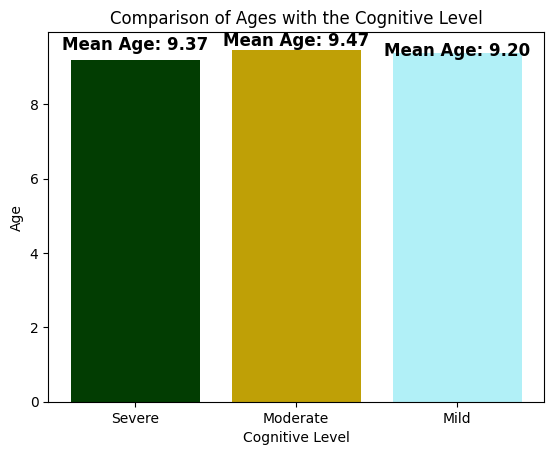

In [15]:
# Split the data into two groups: customers who took FD and those who didn't
fd_severe = df[df['Cognitive Level'] == 2]['Age (5-14)']
fd_moderate = df[df['Cognitive Level'] == 1]['Age (5-14)']
fd_mild = df[df['Cognitive Level'] == 0]['Age (5-14)']

# Create a bar plot
plt.bar(['Severe', 'Moderate', 'Mild'], [fd_severe.mean(), fd_moderate.mean(), fd_mild.mean()], color=['#023d02', '#bfa006', '#B1F0F7'])

# Add labels to the bars
plt.text(0, fd_mild.mean(), f'Mean Age: {fd_mild.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.text(1, fd_moderate.mean(), f'Mean Age: {fd_moderate.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.text(2, fd_severe.mean(), f'Mean Age: {fd_severe.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add labels and title
plt.xlabel('Cognitive Level')
plt.ylabel('Age')
plt.title('Comparison of Ages with the Cognitive Level')

# Show the plot
plt.show()

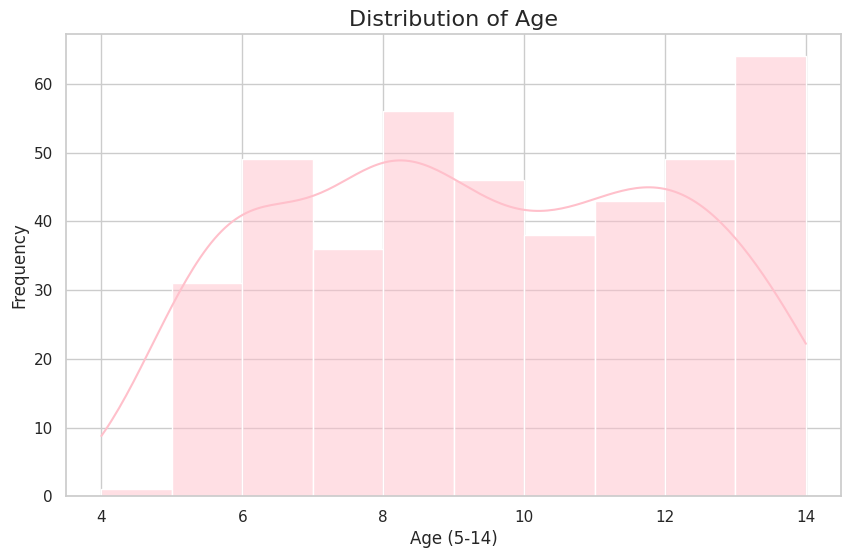

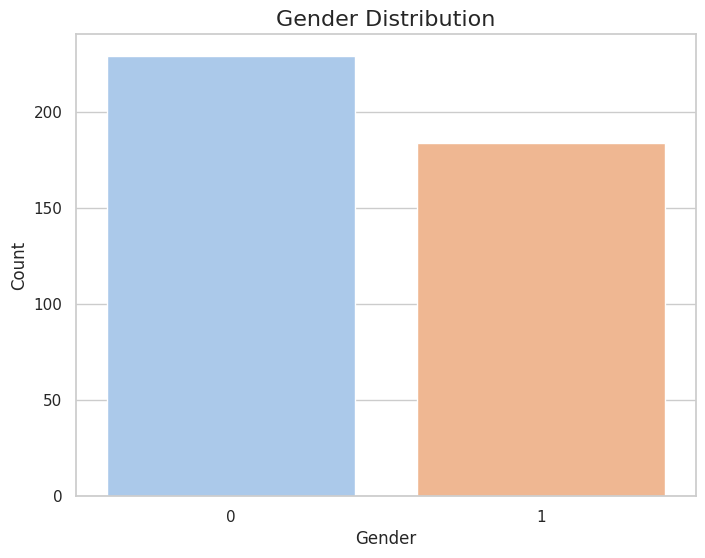

In [16]:
# Set style for visualizations
sns.set(style="whitegrid")

# 1. Distribution of Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age (5-14)'], bins=10, kde=True, color='pink')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age (5-14)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# 2. Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel", hue=gender_counts.index, dodge=False)
plt.title("Gender Distribution", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend([], [], frameon=False)  # Remove legend since it duplicates the x-axis
plt.show()

### **Split the Dataset into Train set, Test set and Validation set**

In [9]:
#Split the dataset
X = df.drop('Cognitive Level', axis=1)
y = df['Cognitive Level']

# split into train (80%) and temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temp set (20%) into validation (10%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print sizes to verify
print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")
print(f"Validation size: {len(X_val)}")

Train size: 330
Test size: 42
Validation size: 41


### **Data Augmentation**

In [10]:
# Create a SMOTE object
smote = SMOTE(random_state=42)  # You can change the random_state for different results

# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print the class distribution before and after SMOTE
print("Original class distribution:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_res.value_counts())

Original class distribution: Cognitive Level
1    142
2    107
0     81
Name: count, dtype: int64
Class distribution after SMOTE: Cognitive Level
1    142
0    142
2    142
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


## **Random Forest Classifier**

In [ ]:
# Assuming X_train_res, y_train_res are your training data after SMOTE

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 10, 15, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum numbe r of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=skf, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_res, y_train_res)

# Get the best model and its hyperparameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Make predictions on the validation set
y_pred_train = best_rf_model.predict(X_train_res)

# Make predictions on the validation set
y_pred_val = best_rf_model.predict(X_val)

# Make predictions on the test set
y_pred_test = best_rf_model.predict(X_test)

print("Random Forest Classifier")
# Evaluate the model
print("\nxAccuracy of Training Data:", accuracy_score(y_train_res, y_pred_train))
print("\nClassification Report of Training Data:\n", classification_report(y_train_res, y_pred_train))
# print("\nConfusion Matrix:\n", confusion_matrix(y_train_res, y_pred_train))

print("\nAccuracy of Validation Data:", accuracy_score(y_val, y_pred_val))
print("\nClassification Report of Validation Data:\n", classification_report(y_val, y_pred_val))
# print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

print("\nAccuracy of Test Data:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report of Test Data:\n", classification_report(y_test, y_pred_test))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Random Forest Classifier

Accuracy of Training Data: 0.9976525821596244

Classification Report of Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       0.99      1.00      1.00       142
           2       1.00      0.99      1.00       142

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


Accuracy of Validation Data: 0.9024390243902439

Classification Report of Validation Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.88      0.95      0.91        22
           2       0.91      0.77      0.83        13

    accuracy                           0.90        41
   macro avg       0.93      0.91      0.92        41
weighted avg       0.90      0.90      0.90        41


Accuracy of Test Data: 0.92857

Heap Map for Validation Data:



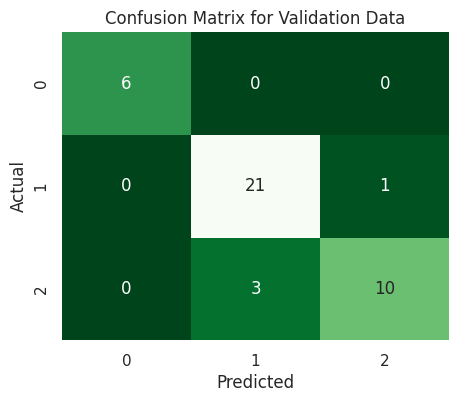



Heap Map for Test Data:



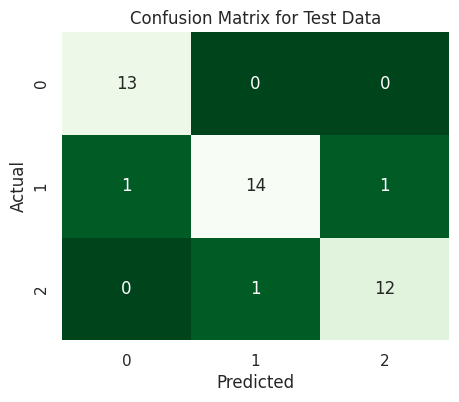

In [ ]:
# Confusion Matrix
val_conf_matrix = confusion_matrix(y_val, y_pred_val)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

# Create a heatmap
print("Heap Map for Validation Data:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Greens_r', cbar=False)
plt.title("Confusion Matrix for Validation Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

print("Heap Map for Test Data:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens_r', cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

In [ ]:
# Calculate training error
rf_train_pred = best_rf_model.predict(X_train_res)
mse_train = mean_squared_error(y_train_res, rf_train_pred)
train_accuracy = 1 - mse_train

# Calculate validation error
rf_val_pred = best_rf_model.predict(X_val)
mse_val = mean_squared_error(y_val, rf_val_pred)
val_accuracy = 1 - mse_val

# Calculate testing error
rf_test_pred = best_rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, rf_test_pred)
test_accuracy = 1 - mse_test


print("Mean Squared Error of the Training, Validation and Testing set:\n")
print("Training Error of Random Forest Model:", mse_train)
print("Validation Error of Random Forest Model:", mse_val)
print("Testing Error of Random Forest Model:", mse_test)

print()

print("Accuracy of the Training and Testing set:\n")
print("Training Accuracy of Random Forest Model:", train_accuracy)
print("Validation Accuracy of Random Forest Model:", val_accuracy)
print("Testing Accuracy of Random Forest Model:", test_accuracy)

Mean Squared Error of the Training, Validation and Testing set:

Training Error of Random Forest Model: 0.002347417840375587
Validation Error of Random Forest Model: 0.0975609756097561
Testing Error of Random Forest Model: 0.07142857142857142

Accuracy of the Training and Testing set:

Training Accuracy of Random Forest Model: 0.9976525821596244
Validation Accuracy of Random Forest Model: 0.9024390243902439
Testing Accuracy of Random Forest Model: 0.9285714285714286


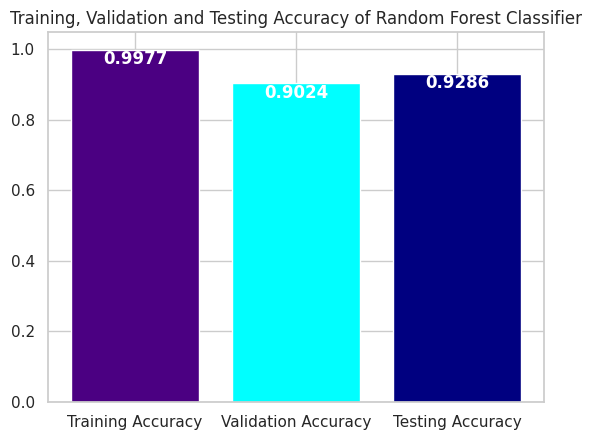

In [ ]:
# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
values = [train_accuracy, val_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['indigo', 'aqua', 'navy'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training, Validation and Testing Accuracy of Random Forest Classifier')
plt.show()

In [ ]:
import pickle

# Create a pickle file for the model
rf_model_pickle = open('random_forest_model.pkl', 'wb')
pickle.dump(best_rf_model, rf_model_pickle)
rf_model_pickle.close()

## **Support Vector Machine**

In [ ]:
# Initialize the Support Vector Classifier with multi-class support
svm_model = SVC(random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [2, 3, 4],  # Only for 'poly' kernel
    'class_weight': [None, 'balanced'],
    'coef0': [-1, 0, 1]
}

skf_svc = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

#  Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=skf, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train_res, y_train_res)

# Get the best model and hyperparameters
best_svc_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Make predictions on the validation set
svm_y_pred_val = best_svc_model.predict(X_val)

# Make predictions on the test set
svm_y_pred_test = best_svc_model.predict(X_test)


Best Hyperparameters: {'C': 1, 'class_weight': None, 'coef0': -1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
# Evaluate on the validation data
svm_val_conf_matrix = confusion_matrix(y_val, svm_y_pred_val)

# Evaluate on the test data
svm_test_conf_matrix = confusion_matrix(y_test, svm_y_pred_test)

# Evaluate the predictions
print("Confusion Matrix of Validation Data:\n")
print(svm_val_conf_matrix)

print("Confusion Matrix of Test Data:\n")
print(svm_test_conf_matrix)

Confusion Matrix of Validation Data:

[[ 6  0  0]
 [ 0 22  0]
 [ 0  0 13]]
Confusion Matrix of Test Data:

[[13  0  0]
 [ 0 16  0]
 [ 0  0 13]]


Heap Map for Validation Data:



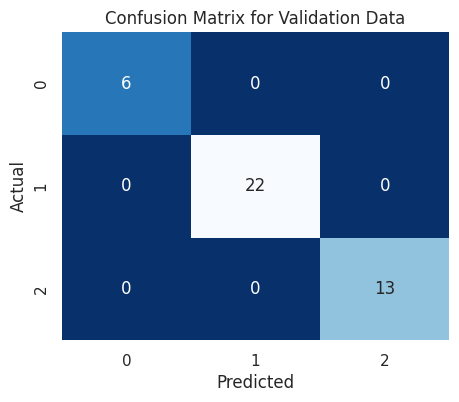



Heap Map for Test Data:



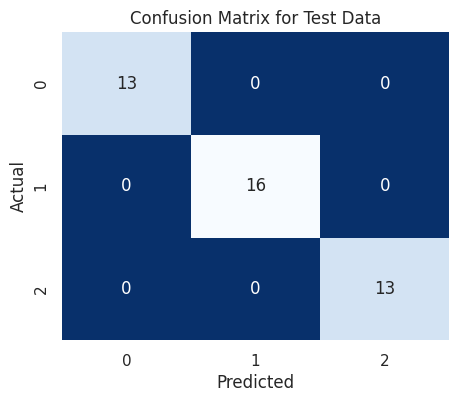

In [ ]:
# Create a heatmap
print("Heap Map for Validation Data:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(svm_val_conf_matrix, annot=True, fmt='d', cmap='Blues_r', cbar=False)
plt.title("Confusion Matrix for Validation Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

print("Heap Map for Test Data:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(svm_test_conf_matrix, annot=True, fmt='d', cmap='Blues_r', cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

In [ ]:
# Validation Set Evaluation
y_pred_val = best_svc_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("\nValidation Set Performance:")
print(f"Accuracy: {accuracy_val}")
print(classification_report(y_val, y_pred_val))

# Test Set Evaluation
y_pred_test = best_svc_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_test}")
print(classification_report(y_test, y_pred_test))


Validation Set Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41


Test Set Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        13

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [ ]:
# Calculate training error
svm_train_pred = best_svc_model.predict(X_train_res)
mse_train = mean_squared_error(y_train_res, svm_train_pred)
train_accuracy = 1 - mse_train

# Calculate validation error
svm_val_pred = best_svc_model.predict(X_val)
mse_val = mean_squared_error(y_val, svm_val_pred)
val_accuracy = 1 - mse_val

# Calculate testing error
svm_test_pred = best_svc_model.predict(X_test)
mse_test = mean_squared_error(y_test, svm_test_pred)
test_accuracy = 1 - mse_test

print("Mean Squared Error of the Training and Testing set:\n")
print("Training Error of SVM Model:", mse_train)
print("Validation Error of SVM Model:", mse_val)
print("Testing Error of SVM Model:", mse_test)

print()

print("Accuracy of the Training and Testing set:\n")
print("Training Accuracy of SVM Model:", train_accuracy)
print("Validation Accuracy of SVM Model:", val_accuracy)
print("Testing Accuracy of SVM Model:", test_accuracy)

Mean Squared Error of the Training and Testing set:

Training Error of SVM Model: 0.0
Validation Error of SVM Model: 0.0
Testing Error of SVM Model: 0.0

Accuracy of the Training and Testing set:

Training Accuracy of SVM Model: 1.0
Validation Accuracy of SVM Model: 1.0
Testing Accuracy of SVM Model: 1.0


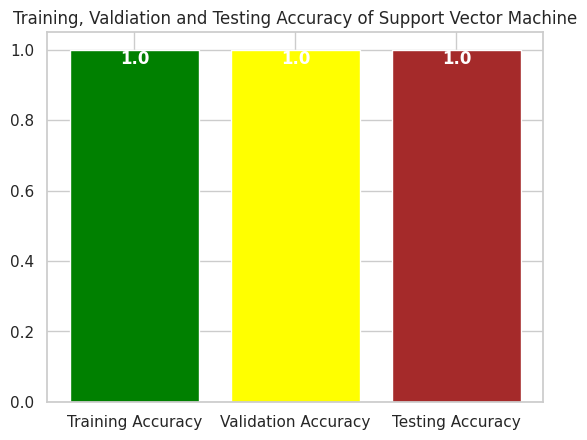

In [ ]:
# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
values = [train_accuracy, val_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['green', 'yellow', 'brown'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training, Valdiation and Testing Accuracy of Support Vector Machine')
plt.show()

In [ ]:
# Create a pickle file for the model
svm_model_pickle = open('svm_model.pkl', 'wb')
pickle.dump(best_svc_model, svm_model_pickle)
svm_model_pickle.close()

## **Logistic Regression Model**


In [24]:
# Create and train the Logistic Regression model
log_reg_model = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)  # 'multinomial' for multi-class problems

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300],
    'solver': ['liblinear', 'saga']
}

# Create StratifiedKFold object
skf_lr = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# reate GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, cv=skf_lr, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train_res, y_train_res)

# Get the best model and hyperparameters
best_lr_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Best hyperparameters: {'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [25]:
# Make predictions on the train set
y_train_pred = best_lr_model.predict(X_train_res)

# Evaluate the model with a confusion matrix and classification report
conf_matrix_train = confusion_matrix(y_train_res, y_train_pred)

# Make predictions on the validation set
y_val_pred = best_lr_model.predict(X_val)

# Evaluate the model with a confusion matrix and classification report
conf_matrix_val = confusion_matrix(y_val, y_val_pred)

# Make predictions on the test set
y_test_pred = best_lr_model.predict(X_test)

# Evaluate the model with a confusion matrix and classification report
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Evaluate
print("Confusion Matrix (Validation Set):")
print(conf_matrix_val)

print("Confusion Matrix (Test Set):")

print(conf_matrix_test)

Confusion Matrix (Validation Set):
[[ 6  0  0]
 [ 0 22  0]
 [ 0  3 10]]
Confusion Matrix (Test Set):
[[13  0  0]
 [ 0 16  0]
 [ 0  1 12]]


In [26]:
# Train Set Evaluation
print("Logistic Regression Model:")
y_pred_train = best_lr_model.predict(X_train_res)
accuracy_train = accuracy_score(y_train_res, y_pred_train)
print("\nTraining Set Performance:")
print(f"Accuracy: {accuracy_train}")
print(classification_report(y_train_res, y_pred_train))

# Validation Set Evaluation
y_pred_val = best_lr_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("\nValidation Set Performance:")
print(f"Accuracy: {accuracy_val}")
print(classification_report(y_val, y_pred_val))

# Test Set Evaluation
y_pred_test = best_lr_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_test}")
print(classification_report(y_test, y_pred_test))

Logistic Regression Model:

Training Set Performance:
Accuracy: 0.9765258215962441
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       0.94      0.99      0.97       142
           2       0.99      0.94      0.96       142

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426


Validation Set Performance:
Accuracy: 0.926829268292683
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.88      1.00      0.94        22
           2       1.00      0.77      0.87        13

    accuracy                           0.93        41
   macro avg       0.96      0.92      0.94        41
weighted avg       0.94      0.93      0.92        41


Test Set Performance:
Accuracy: 0.9761904761904762
              precision    recall  f1-score   

In [27]:
# Calculate training error
lr_train_pred = best_lr_model.predict(X_train_res)
mse_train = mean_squared_error(y_train_res, lr_train_pred)
train_accuracy = 1 - mse_train

# Calculate validation error
lr_val_pred = best_lr_model.predict(X_val)
mse_val = mean_squared_error(y_val, lr_val_pred)
val_accuracy = 1 - mse_val

# Calculate testing error
lr_test_pred = best_lr_model.predict(X_test)
mse_test = mean_squared_error(y_test, lr_test_pred)
test_accuracy = 1 - mse_test

print("Mean Squared Error:\n")
print("Training Error of Logistic Regression Model:", mse_train)
print("Validation Error of Logistic Regression Model:", mse_val)
print("Testing Error of Logistic Regression Model:", mse_test)

print()

print("Accuracy:\n")
print("Training Accuracy of Logistic Regression Model:", train_accuracy)
print("Validation Accuracy of Logistic Regression Model:", val_accuracy)
print("Testing Accuracy of Logistic Regression Model:", test_accuracy)

Mean Squared Error:

Training Error of Logistic Regression Model: 0.023474178403755867
Validation Error of Logistic Regression Model: 0.07317073170731707
Testing Error of Logistic Regression Model: 0.023809523809523808

Accuracy:

Training Accuracy of Logistic Regression Model: 0.9765258215962441
Validation Accuracy of Logistic Regression Model: 0.926829268292683
Testing Accuracy of Logistic Regression Model: 0.9761904761904762


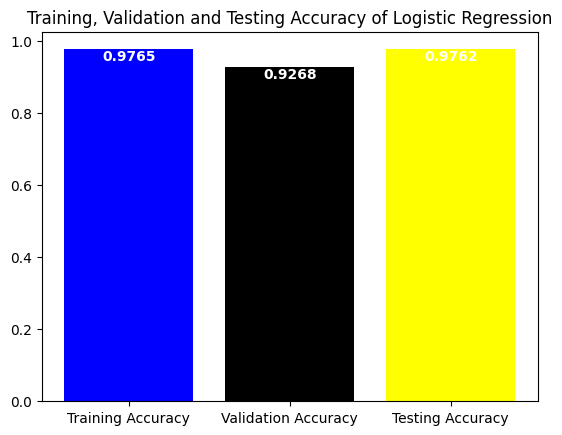

In [28]:
# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
values = [train_accuracy, val_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'black', 'yellow'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training, Validation and Testing Accuracy of Logistic Regression')
plt.show()

In [29]:
# Create a pickle file for the model
lr_model_pickle = open('lr_model.pkl', 'wb')
pickle.dump(best_lr_model, lr_model_pickle)
lr_model_pickle.close()

# **Multilayer Perceptron**

In [25]:
!pip install scikit-learn==1.2.3 # Downgrade scikit-learn
!pip install scikeras

ERROR: Could not find a version that satisfies the requirement scikit-learn==1.2.3 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21.1, 0.21.2, 0.21.3, 0.22, 0.22.1, 0.22.2.post1, 0.23.0, 0.23.1, 0.23.2, 0.24.0, 0.24.1, 0.24.2, 1.0, 1.0.1, 1.0.2, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2.0rc1, 1.2.0, 1.2.1, 1.2.2, 1.3.0rc1, 1.3.0, 1.3.1, 1.3.2, 1.4.0rc1, 1.4.0, 1.4.1.post1, 1.4.2, 1.5.0rc1, 1.5.0, 1.5.1, 1.5.2, 1.6.0rc1, 1.6.0)
ERROR: No matching distribution found for scikit-learn==1.2.3


In [18]:
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import _validation

# Define the MLP model
def create_model(hidden_layer_sizes=(100,), activation='relu', optimizer='adam'):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_train_res.shape[1],)))  # Input layer
    for size in hidden_layer_sizes:
        model.add(keras.layers.Dense(size, activation=activation))  # Hidden layers
    model.add(keras.layers.Dense(3, activation='softmax'))  # Output layer (3 classes)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier for GridSearchCV
model = KerasClassifier(model=create_model, verbose=0)

# Define the parameter grid
# param_grid = {
#     'model__hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
#     'model__activation': ['relu', 'tanh'],
#     'model__optimizer': ['adam', 'sgd'],
#     'batch_size': [32, 64],
#     'epochs': [50, 100]
# }

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Force scikeras to use the older check_cv behavior
# Assign the old `check_cv` to `KerasClassifier._check_cv`
KerasClassifier._check_cv = _validation.check_cv

# Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, scoring='accuracy')

# Fit the GridSearchCV object to the training data
# grid_search.fit(X_train_res, y_train_res)

model.fit(X_train_res, y_train_res)

# Get the best model and its hyperparameters
# best_mlp_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# print("Best Hyperparameters:", best_params)

# Evaluate the best model on the validation and test sets
train_acc = model.score(X_train_res, y_train_res)
val_acc = model.score(X_val, y_val)
test_acc = model.score(X_test, y_test)

In [20]:
print("Training Accuracy:", train_acc)
print(classification_report(y_train_res, model.predict(X_train_res))) # Change here

print("\nValidation Accuracy:", val_acc)
print(classification_report(y_val, model.predict(X_val)))  # Change here

print("\nTest Accuracy:", test_acc)
print(classification_report(y_test, model.predict(X_test)))  # Change here

Training Accuracy: 0.5023474178403756
              precision    recall  f1-score   support

           0       0.66      0.78      0.71       142
           1       0.40      0.71      0.51       142
           2       0.40      0.01      0.03       142

    accuracy                           0.50       426
   macro avg       0.49      0.50      0.42       426
weighted avg       0.49      0.50      0.42       426


Validation Accuracy: 0.43902439024390244


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.31      0.67      0.42         6
           1       0.50      0.64      0.56        22
           2       0.00      0.00      0.00        13

    accuracy                           0.44        41
   macro avg       0.27      0.43      0.33        41
weighted avg       0.31      0.44      0.36        41


Test Accuracy: 0.6190476190476191
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.50      0.94      0.65        16
           2       0.00      0.00      0.00        13

    accuracy                           0.62        42
   macro avg       0.47      0.59      0.51        42
weighted avg       0.47      0.62      0.52        42



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **XGBoost**

In [27]:
!pip install xgboost==1.7.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 4.0 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [12]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error


# Set XGBoost parameters
params = {
    'objective': 'multi:softprob',
    'num_class': 3,
    # 'eval_metric': 'mlogloss',
    'max_depth': 3,  # Control tree depth to prevent overfitting (start with a reasonable value)
    'eta': 0.03,  # Learning rate (step size shrinkage)
    'subsample': 0.8,  # Fraction of samples used for training each tree
    'colsample_bytree': 0.8,  # Fraction of features used for training each tree
    'gamma': 2, # minimum loss reduction
    'lambda': 1.0,
    'alpha': 0.5,
}


# Create a StratifiedKFold object
skf_xgb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss', **params)  # Use your existing params as a base

# Create a GridSearchCV object
# grid_search = GridSearchCV(
#     estimator=xgb_classifier,
#     param_grid=params,
#     scoring='accuracy',
#     cv=skf_xgb,
#     verbose=2,  # Print progress during the search
#     n_jobs=-1   # Use all available CPU cores for parallel processing
# )

# 5. Fit the GridSearchCV object to the training data
# grid_search.fit(X_train_res, y_train_res)

xgb_classifier.fit(X_train_res, y_train_res)

# 6. Get the best model and its hyperparameters
# best_xgb_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# print("Best hyperparameters:", best_params)

# 7. Evaluate the best model on the test set
y_pred_test = xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", test_accuracy)


Test accuracy: 0.8809523809523809


In [21]:
y_pred_train = xgb_classifier.predict(X_train_res)
y_pred_test = xgb_classifier.predict(X_test)
y_pred_val = xgb_classifier.predict(X_val)

print("XGBoost Model:")
# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train_res, y_pred_train))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nClassification Report (Validation Set):\n", classification_report(y_val, y_pred_val))
print("\nConfusion Matrix (Validation Set):\n", confusion_matrix(y_val, y_pred_val))

print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred_test))

XGBoost Model:
Training Accuracy: 0.9483568075117371
Validation Accuracy: 0.8780487804878049
Test Accuracy: 0.8809523809523809

Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.95      0.82      0.88        22
           2       0.80      0.92      0.86        13

    accuracy                           0.88        41
   macro avg       0.87      0.91      0.89        41
weighted avg       0.89      0.88      0.88        41


Confusion Matrix (Validation Set):
 [[ 6  0  0]
 [ 1 18  3]
 [ 0  1 12]]

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      0.75      0.83        16
           2       0.75      0.92      0.83        13

    accuracy                           0.88        42
   macro avg       0.89      0.89      0.89        42
weighted avg  

Confusion Matrix of Validation Data:

[[ 6  0  0]
 [ 1 18  3]
 [ 0  1 12]]
Confusion Matrix of Test Data:

[[13  0  0]
 [ 0 12  4]
 [ 0  1 12]]
Heap Map for Validation Data:



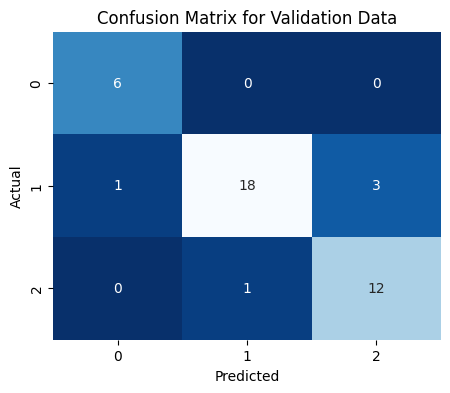



Heap Map for Test Data:



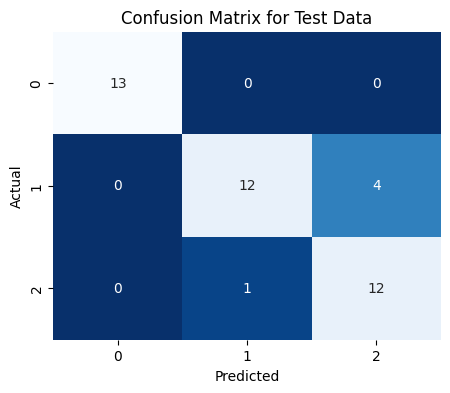

In [14]:
# Evaluate on the validation data
xgb_val_conf_matrix = confusion_matrix(y_val, y_pred_val)

# Evaluate on the test data
xgb_test_conf_matrix = confusion_matrix(y_test, y_pred_test)

# Evaluate the predictions
print("Confusion Matrix of Validation Data:\n")
print(xgb_val_conf_matrix)

print("Confusion Matrix of Test Data:\n")
print(xgb_test_conf_matrix)


# Create a heatmap
print("Heap Map for Validation Data:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(xgb_val_conf_matrix, annot=True, fmt='d', cmap='Blues_r', cbar=False)
plt.title("Confusion Matrix for Validation Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

print("Heap Map for Test Data:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(xgb_test_conf_matrix, annot=True, fmt='d', cmap='Blues_r', cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

In [15]:
# Calculate training error
xgb_train_pred = xgb_classifier.predict(X_train_res)
mse_train = mean_squared_error(y_train_res, xgb_train_pred)
train_accuracy = 1 - mse_train

# Calculate validation error
xgb_val_pred = xgb_classifier.predict(X_val)
mse_val = mean_squared_error(y_val, xgb_val_pred)
val_accuracy = 1 - mse_val

# Calculate testing error
xgb_test_pred = xgb_classifier.predict(X_test)
mse_test = mean_squared_error(y_test, xgb_test_pred)
test_accuracy = 1 - mse_test

print("Mean Squared Error:\n")
print("Training Error of XGBoost Model:", mse_train)
print("Validation Error of XGBoost Model:", mse_val)
print("Testing Error of XGBoost Model:", mse_test)

print()

print("Accuracy:\n")
print("Training Accuracy of XGBoost Model:", train_accuracy)
print("Validation Accuracy of XGBoost Model:", val_accuracy)
print("Testing Accuracy of XGBoost Model:", test_accuracy)

Mean Squared Error:

Training Error of XGBoost Model: 0.051643192488262914
Validation Error of XGBoost Model: 0.12195121951219512
Testing Error of XGBoost Model: 0.11904761904761904

Accuracy:

Training Accuracy of XGBoost Model: 0.9483568075117371
Validation Accuracy of XGBoost Model: 0.8780487804878049
Testing Accuracy of XGBoost Model: 0.8809523809523809


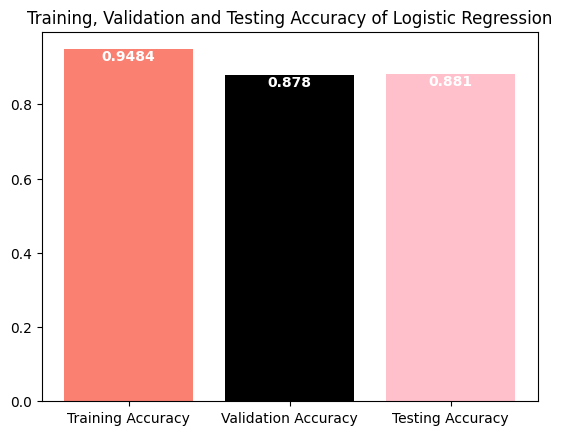

In [16]:
# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
values = [train_accuracy, val_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['salmon', 'black', 'pink'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training, Validation and Testing Accuracy of Logistic Regression')
plt.show()

**Best Model - Logistic Regression model**

Reason - Logistic Regression has the highest testing accuracy (97.62%) and lowest testing error (0.0238), outperforming both XGBoost and Random Forest. Logistic Regression provides consistent F1-scores across all classes, making it suitable for balanced datasets. Logistic Regression maintains a small gap between training, validation, and test accuracies, indicating strong generalization.

# **Predicting the Cognitive Level**

In [ ]:
def recommend_activities(age, Cognitive_Level, user_input):
    # Define activity recommendations based on age and cognitive level, focusing on developing cognitive skills
    activity_recommendations = {
        0: {  # Mild Level Activities
            '5_to_8': [
                "Role-playing Social Scenarios",
                "Routine Building",
            ],
            '9_to_11': [
                "Pretend to run a grocery store or library to teach social roles and cooperation",
                "Create indoor or outdoor hunts with clues to enhance critical thinking and observation skills",
            ],
            '12_to_14': [
                "Offer riddles or real-world challenges like planning a picnic",
                "Use visual calendars to teach time management and planning",
            ]
        },
        1: {  # Moderate Level Activities
            '5_to_8': [
                "Work together on a mural or collage",
                "Count objects during daily activities (eg: setting the table, sorting groceries)",
            ],
            '9_to_11': [
                "Play games like 'Simon Says' to practice listening and responding",
                "Asking questions about the day",
            ],
            '12_to_14': [
                "Provide puzzles of varying complexity to build problem-solving",
                "Take turns adding to a story to foster creativity and active listening"

            ]
        },
        2: {  # Severe Level Activities
            '5_to_8': [
                "Use cards with matching pairs (colors, animals, etc.) to improve memory and focus",
                "Teach behaviours in different social situations",
            ],
            '9_to_11': [
                "Have the child sort objects by color, size, or shape to develop categorization skills",
                "Use picture cards to sequence events in a logical order",
            ],
            '12_to_14': [
                "Engage in activities that involve identifying and completing patterns (eg: bead stringing)",
                "Activities like building with limited blocks to teach collaboration and sharing",
            ]
        }
    }

    # Determine the appropriate age group
    if 5 <= age <= 8:
        age_group = '5_to_8'
    elif 9 <= age <= 11:
        age_group = '9_to_11'
    else:  # For ages 12 to 14
        age_group = '12_to_14'

    # Select the activities based on age and metacognitive level
    if Cognitive_Level in activity_recommendations:
        selected_activities = activity_recommendations[Cognitive_Level].get(age_group, [])
    else:
        return []  # Return an empty list if no matching activities are found

    return selected_activities


In [35]:
# Step 1: Prepare user input with all 9 features
user_input = {
    'gender': 1,  # male-1, female-0
    'age': 7,
    'family_history': 0,  # yes-1, no-0
    'problem_solving': 4,
    'visual_learning_pref': 3,
    'response_to_guidance': 2,
    'task_independece': 1,
    'object_identification': 5,
    'error_correction': 3
}

# Step 2: Create the input vector with all 9 features (match the feature order of X_train_res)
input_features = [
    user_input['gender'],
    user_input['age'],
    user_input['family_history'],
    user_input['problem_solving'],
    user_input['visual_learning_pref'],
    user_input['response_to_guidance'],
    user_input['task_independece'],
    user_input['object_identification'],
    user_input['error_correction']
]

# Step 3: Predict the Cognitive Level using Logistic Regression model
predicted_cognitive_level = best_lr_model.predict([input_features])[0]

if predicted_cognitive_level == 0:
    print("Cognitive Level: Mild")
elif predicted_cognitive_level == 1:
    print("Cognitive Level: Moderate")
elif predicted_cognitive_level == 2:
    print("Cognitive Level: Severe")

# Step 4: Get activity recommendations based on predicted cognitive level and age
recommended_activities = recommend_activities(user_input['age'], predicted_cognitive_level, user_input)

# Step 5: Output the results
print("\nRecommended Activities:")
for activity in recommended_activities:
    print(f"- {activity}")


Cognitive Level: Moderate

Recommended Activities:
- Work together on a mural or collage
- Count objects during daily activities (eg: setting the table, sorting groceries)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### **Taking user inputs**

In [36]:
def collect_user_input():
    def get_valid_age():
        while True:
            try:
                age = int(input("Enter Age (5 or older): "))
                if age >= 5:
                    return age
                else:
                    print("Age must be 4 or older. Please try again.")
            except ValueError:
                print("Invalid input. Please enter a valid number for age.")

    def get_valid_rating(prompt):
        while True:
            try:
                rating = int(input(f"{prompt} (1-5): "))
                if 1 <= rating <= 5:
                    return rating
                else:
                    print("Rating must be between 1 and 5. Please try again.")
            except ValueError:
                print("Invalid input. Please enter a valid number between 1 and 5.")

    # Collect user input
    return {
        'age': get_valid_age(),
        'gender': input("Enter Gender (M/F): ").strip().upper(),
        'family_history': input("Any family member with autism? (yes/no): ").strip().lower(),
        'problem_solving': get_valid_rating("Rate Problem Solving Skills"),
        'visual_learning_pref': get_valid_rating("Rate Visual Learning Preference"),
        'response_to_guidance': get_valid_rating("Rate Response to Guidance"),
        'task_independece': get_valid_rating("Rate Task Independence"),
        'object_identification': get_valid_rating("Rate Object Identification Abilities"),
        'error_correction': get_valid_rating("Rate Error Correction Abilities")
    }


In [37]:
# Function to preprocess the input
def preprocess_input(user_input):
    # Transform the user input into a suitable format for prediction
    user_input['gender'] = 1 if user_input['gender'].lower() == 'M' else 0
    user_input['family_history'] = 1 if user_input['family_history'].lower() == 'yes' else 0

    # Example preprocessing: convert to DataFrame (if using pandas)
    return pd.DataFrame([user_input])

In [38]:
# Collect user input
user_input = collect_user_input()

# Preprocess the user input (convert to the correct format for prediction)
preprocessed_input = preprocess_input(user_input).values

# Use the trained MLP model to predict the Metacognitive Level
predicted_cognitive_level = best_lr_model.predict(preprocessed_input)[0]  # Predict the level for the input

# Provide activity recommendations based on the predicted Metacognitive Level
recommended_activities = recommend_activities(user_input['age'],predicted_cognitive_level, user_input)

# Output the predicted level and recommended activities
if predicted_cognitive_level == 0:
    print("\nCognitive Level: Mild")
elif predicted_cognitive_level == 1:
    print("\nCognitive Level: Moderate")
elif predicted_cognitive_level == 2:
    print("\nCognitive Level: Severe")

    print("\nRecommended Activities:")
for activity in recommended_activities:
    print(f"- {activity}")


Enter Age (5 or older): 6
Enter Gender (M/F): 1
Any family member with autism? (yes/no): 1
Rate Problem Solving Skills (1-5): 1
Rate Visual Learning Preference (1-5): 1
Rate Response to Guidance (1-5): 1
Rate Task Independence (1-5): 1
Rate Object Identification Abilities (1-5): 2
Rate Error Correction Abilities (1-5): 2

Cognitive Level: Severe

Recommended Activities:
- Use cards with matching pairs (colors, animals, etc.) to improve memory and focus
- Teach hehaviours in different social situations


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
